<a href="https://colab.research.google.com/github/syedaftab-dev/Machine-learning/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K MEANS CLUSTERING ALGORITHM

In [24]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

make_blobs()

👉 Function that creates blobs (clusters of points) in N-dimensional space.
It’s often used for:

Testing clustering algorithms (like K-Means, DBSCAN).

Visualization and practice.

In [25]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)
# centers=3
# Number of clusters to generate.
# If you give centers=3, it means your data will have 3 different groups (clusters).

In [26]:
y

array([1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 0,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 0,
       2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2,
       0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1,
       0, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0,

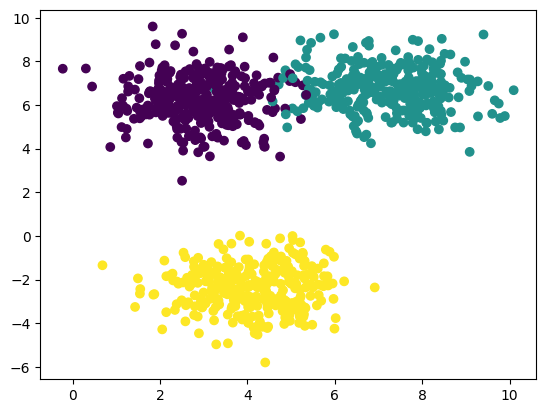

In [27]:
plt.scatter(X[:,0],X[:,1],c=y) #color =y

In [28]:
# stardization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.cluster import KMeans


# ELbow Method to select the K value

In [31]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train_scaled)
  wcss.append(kmeans.inertia_)
  #kmeans.inertia_ -> contains wcss value for a clusters and their centroids

In [32]:
wcss

[1340.0000000000014,
 670.5517208156207,
 188.87545117356723,
 154.95586878781927,
 112.55812973445805,
 112.46142606941692,
 77.72797857240448,
 71.50210495791868,
 62.2806435356878,
 56.528330760759445]

Text(0.5, 1.0, 'The Elbow Method')

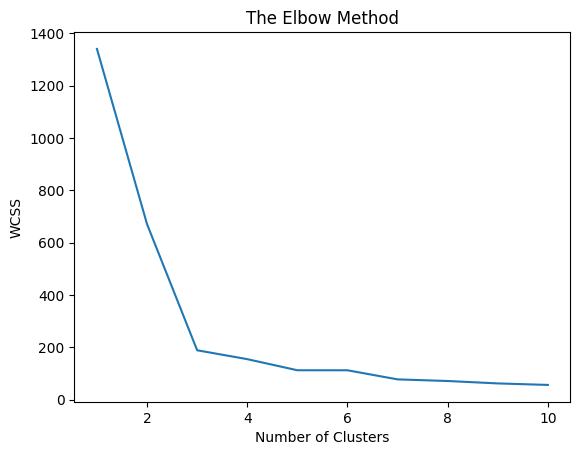

In [33]:
# ploting the elbow curve

plt.plot(range(1,11),wcss)  # range(1,11)->k values 1 to 10
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Method")

Observation -> abrupt decrease in wcsss at k=3 so we select k=3

In [34]:
kmeans=KMeans(n_clusters=3,init="k-means++")


In [35]:
kmeans.fit_predict(X_test_scaled)

array([1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1,
       1, 2, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0,
       1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 1, 2,
       2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0,
       0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0,
       1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0,

In [36]:
y_pred = kmeans.predict(X_test_scaled)

In [37]:
y_pred

array([1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1,
       1, 2, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0,
       1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 1, 2,
       2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0,
       0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0,
       1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0,

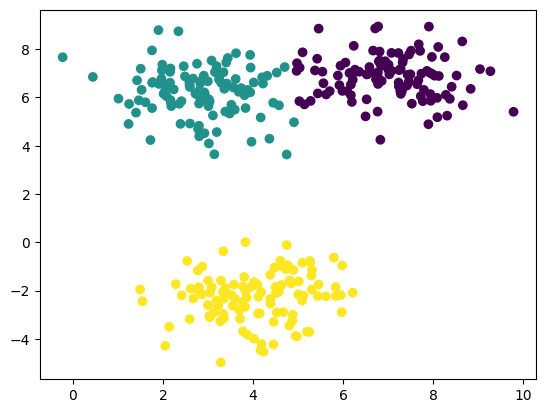

In [40]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred) #color determined by y_pred

# Validating the K values

1. Knee Locator
2. Silhoutee scoring

In [41]:
# knee Locator
!pip install kneed

In [42]:
from kneed import KneeLocator

In [43]:
# we got convex curve earlier
# we here reversed it and decreasing
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

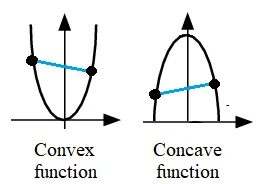

In [45]:
kl.elbow
# yes we got the same k  values

np.int64(3)

In [46]:
# silhoutte score
from sklearn.metrics import silhouette_score

In [47]:
silhouette_coefficients=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train_scaled)
  score=silhouette_score(X_train_scaled,kmeans.labels_)
  silhouette_coefficients.append(score)

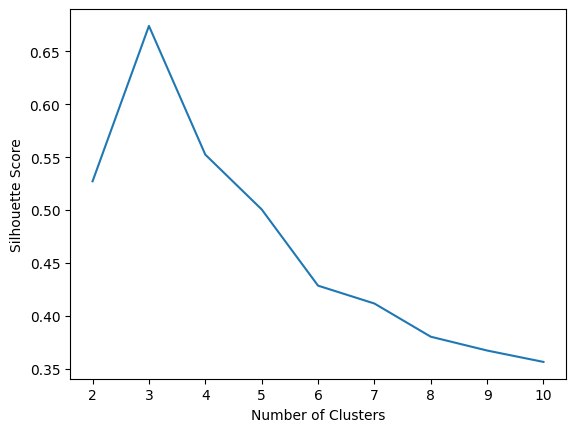

In [49]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# where ever the silhoute coefficent is high we take that k value ie k=3 here